In [ ]:
import sympy as sym
from sympy.geometry import *

x = sym.Symbol('x')
y = sym.Symbol('y')

sym.plot_implicit(sym.Eq(x**2+y**2,1))


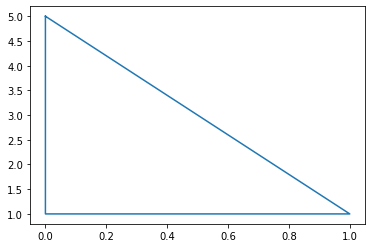

In [3]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
polygon1 = Polygon([[0, 5], [1, 1], [0, 1]])
x,y = polygon1.exterior.xy
plt.plot(x,y)
plt.savefig("image.png")

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(2)
def polygon(sides):
    r=1
    phi=0

    

    angle = 2*math.pi/(sides)
    T = np.arange(-math.pi,math.pi+angle, angle)
    

    x, y = np.cos(T), np.sin(T)
    plt.plot(x,y)
    
    plt.axis('equal') 
    plt.axis('off')
    plt.show()

interactive_plot = interactive(polygon, sides=(2,16,0.1))
interactive_plot

In [ ]:
from ipywidgets import Label, HTML, HBox, Image, VBox, Box, HBox
from IPython.display import display
from ipyevents import Event 
from ipycanvas import Canvas

canvas = Canvas(width=200, height=200)

canvas.fill_style = '#63934e'
canvas.stroke_style = '#4e6393'
canvas.line_width = 5
# canvas.fill_polygon([(20, 20), (180, 20), (100, 150)])
coords = []

canvas.stroke_polygon(coords)

im_events = Event()
im_events.source = canvas
im_events.watched_events = ['click', 'keyup', 'keydown']

# no_drag = Event(source=canvas, watched_events=['dragstart'], prevent_default_action = True)

h2 = HTML('Event info')

def update_coords(event):
    canvas.clear()
    lines = ['{}: {}'.format(k, v) for k, v in event.items()]
    content = '<br>'.join(lines)
    h2.value = content
    coords.append((event['layerX'], event['layerY']))
    canvas.stroke_polygon(coords)
    
im_events.on_dom_event(update_coords)

display(canvas, h2)